In [60]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import

In [34]:
# Import data
df = pd.read_csv("/Users/johannesschmidt/Credit-Risk-Model/Credit-Risk-Model/credit_risk_dataset.csv")

## EDA

In [28]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32581 non-null  int64   
 1   person_income               32581 non-null  int64   
 2   person_home_ownership       32581 non-null  category
 3   person_emp_length           31686 non-null  float64 
 4   loan_intent                 32581 non-null  category
 5   loan_grade                  32581 non-null  category
 6   loan_amnt                   32581 non-null  int64   
 7   loan_int_rate               29465 non-null  float64 
 8   loan_status                 32581 non-null  int64   
 9   loan_percent_income         32581 non-null  float64 
 10  cb_person_default_on_file   32581 non-null  category
 11  cb_person_cred_hist_length  32581 non-null  int64   
dtypes: category(4), float64(3), int64(5)
memory usage: 2.1 MB


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [20]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


# Data Preprocessing

## Data Type Conversion 

In [35]:
# Convert 'person_home_ownership' to a categorical variable
df['person_home_ownership'] = df['person_home_ownership'].astype('category')

# Convert 'loan_intent' to a categorical variable
df['loan_intent'] = df['loan_intent'].astype('category')

# Convert 'loan_grade' to a categorical variable
df['loan_grade'] = df['loan_grade'].astype('category')

# Convert 'cb_person_default_on_file' to a categorical variable
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].astype('category')

## Clean missing values

In [25]:
df['loan_int_rate'].isnull().value_counts()

loan_int_rate
False    29465
True      3116
Name: count, dtype: int64

In [31]:
df['person_emp_length'].isnull().value_counts()

person_emp_length
False    28638
True       827
Name: count, dtype: int64

In [46]:
filter_condition = df['loan_int_rate'].notnull() & df['person_emp_length'].notnull()

df = df[filter_condition]

In [47]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

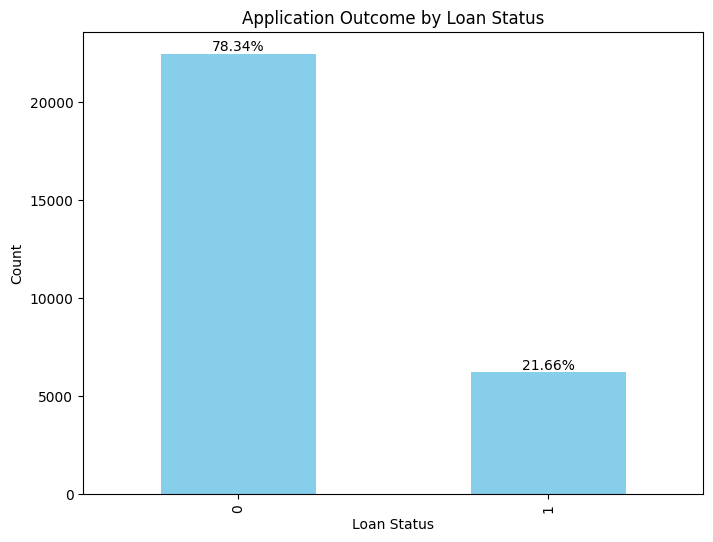

In [49]:
# Count the occurrences of each unique 'loan_status' value
status_counts = df['loan_status'].value_counts()

# Calculate the percentages
status_percentages = (status_counts / status_counts.sum()) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = status_counts.plot(kind='bar', color='skyblue')
plt.title('Application Outcome by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(status_percentages):
    ax.text(i, status_counts[i], f'{v:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()

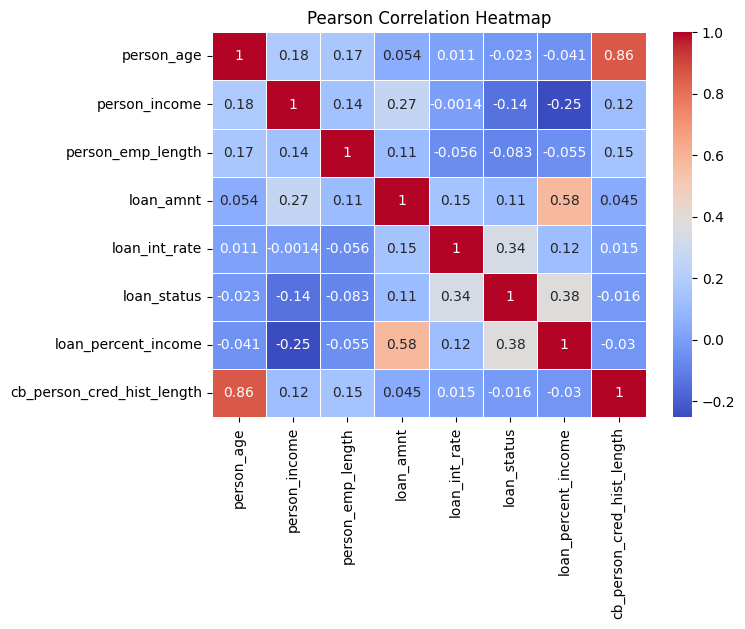

In [59]:
# Select the numerical attributes
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])

# Calculate the Pearson correlation
correlation_table = numerical_attributes.corr()

# Create a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_table, annot=True, cmap="coolwarm", linewidths=0.5)

# Set the plot title
plt.title("Pearson Correlation Heatmap")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


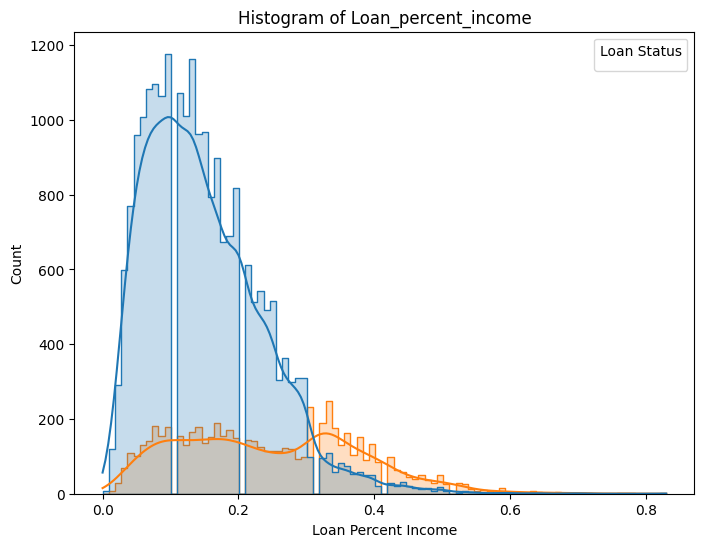

In [57]:
# Create a histogram for 'loan_percent_income'
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='loan_percent_income', kde=True, hue='loan_status', element='step')
plt.title('Histogram of Loan_percent_income')
plt.xlabel('Loan Percent Income')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')

# Show the histogram
plt.show()

# Train/Test Split

In [63]:
# Define your features (X) and target variable (y)
X = df.drop(columns=['loan_status'])  # Features
y = df['loan_status']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22910, 11)
X_test shape: (5728, 11)
y_train shape: (22910,)
y_test shape: (5728,)
